In [3]:
import numpy as np
import pandas as pd
import os

#defining folderpath
folderpath = r'C:\Users\Nuri\Desktop' 

#defining filename
filename = 'theProject.csv'

#defining filepath as folderpath + filename
filepath = os.path.join(folderpath, filename)

#creating the dataframe from the file with StaffID column is set as Index
dfemployee = pd.read_csv(filepath, index_col=['StaffID'])

In [4]:
# removing employees who were hired after the cut off date which is 1 January 2019
from datetime import datetime
indexes = []
for x in range(3090):
        hireDate = dfemployee.iloc[x, 0]
        cutOffDate = datetime(2019, 1, 1)
        hireDateTimeDate = datetime.strptime(hireDate, '%m/%d/%Y')
        hireDateTimeDate.strftime('%Y-%m-%d')
        
        
        if(hireDateTimeDate>cutOffDate):
            indexes.append(x)
dfemployee.drop([dfemployee.index[x] for x in indexes], inplace=True)

In [5]:
# counting the number of rows left after drop
dfemployee.shape

(2750, 73)

In [6]:
# labelling employees whether they've worked and left the firm within 12 months
labels = []
for x in range(2750):
        workMonths = dfemployee.iloc[x, 72]
        if(workMonths<=12):
            labels.append(1)
        else:
            labels.append(0)
dfemployee['leftTheFirm_under12months']=labels

In [7]:
# dropping the original OneHotEncoded columns
listofDropColumns=['Hire Date','Leave Date','Date of Birth','# of Promotions between 2019-2013','Status Details','WorkMonths']
for col in listofDropColumns:
    dfemployee.drop([col], inplace =True, axis = 1)

In [8]:
# splitting the dataframe into X and y, with y being the label "leaving the firm under 12 Months"
X = dfemployee.drop(["leftTheFirm_under12months"], axis = 1)
y = dfemployee["leftTheFirm_under12months"]

In [9]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Build a forest and compute the feature importances
forest = DecisionTreeClassifier()

forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

#Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Automatically created module for IPython interactive environment
Feature ranking:
1. feature 59 (0.188491)
2. feature 57 (0.133959)
3. feature 14 (0.052780)
4. feature 1 (0.052750)
5. feature 18 (0.043023)
6. feature 63 (0.036522)
7. feature 50 (0.036005)
8. feature 61 (0.025173)
9. feature 53 (0.023529)
10. feature 51 (0.022620)
11. feature 39 (0.022264)
12. feature 48 (0.021532)
13. feature 30 (0.020063)
14. feature 24 (0.018982)
15. feature 16 (0.018150)
16. feature 26 (0.016474)
17. feature 10 (0.016108)
18. feature 42 (0.016026)
19. feature 12 (0.015440)
20. feature 45 (0.014587)
21. feature 46 (0.014059)
22. feature 54 (0.012953)
23. feature 19 (0.011254)
24. feature 31 (0.011240)
25. feature 40 (0.010975)
26. feature 49 (0.010581)
27. feature 22 (0.009959)
28. feature 20 (0.009767)
29. feature 28 (0.009279)
30. feature 38 (0.008364)
31. feature 37 (0.008027)
32. feature 13 (0.007905)
33. feature 65 (0.007688)
34. feature 0 (0.007173)
35. feature 32 (0.006982)
36. feature 29 (0.0

NameError: name 'std' is not defined

In [10]:
print(X.iloc[:,59].head())
print(X.iloc[:,57].head())
print(X.iloc[:,1].head())
print(X.iloc[:,14].head())
print(X.iloc[:,18].head())
print(X.iloc[:,63].head())
print(X.iloc[:,50].head())
print(X.iloc[:,12].head())
print(X.iloc[:,51].head())
print(X.iloc[:,61].head())

StaffID
TR994526    0.0
TR996033    0.0
TR996240    0.0
TR995634    0.0
TR995458    0.0
Name: isAge at Last Position 25 & Below, dtype: float64
StaffID
TR994526    1.0
TR996033    1.0
TR996240    1.0
TR995634    1.0
TR995458    1.0
Name: isGeneration Y, dtype: float64
StaffID
TR994526    3
TR996033    1
TR996240    1
TR995634    1
TR995458    1
Name: Level of Education, dtype: int64
StaffID
TR994526    0.0
TR996033    1.0
TR996240    1.0
TR995634    0.0
TR995458    0.0
Name: isAssociate, dtype: float64
StaffID
TR994526    0.0
TR996033    0.0
TR996240    0.0
TR995634    0.0
TR995458    1.0
Name: isSenior Associate, dtype: float64
StaffID
TR994526    0.0
TR996033    1.0
TR996240    1.0
TR995634    0.0
TR995458    1.0
Name: isAges at Entry 25 & Below, dtype: float64
StaffID
TR994526    0.0
TR996033    0.0
TR996240    0.0
TR995634    1.0
TR995458    1.0
Name: isFemale, dtype: float64
StaffID
TR994526    0.0
TR996033    0.0
TR996240    0.0
TR995634    0.0
TR995458    0.0
Name: isPractice Su

In [11]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

#creating lists for recording the scores of classifiers
decisionTreeScores=[[[],[],[]]]
randomForestScores=[[[],[],[]]]
logisticsRegressionScores=[[[],[],[]]]
svmScores=[[[],[],[]]]
scores=[decisionTreeScores, randomForestScores, logisticsRegressionScores, svmScores]

#defining the kfold-cross validation and appending the scores for each classifier into each list
def kfoldcrossval(X, y, clf, kFold, metrics, rand_state=42):
    clIndex = 0
    for cl in clf:
        kIndex = 0
        for k in kFold:
            cv = StratifiedKFold(n_splits=k, random_state=rand_state, shuffle=True)
            for train_index, test_index in cv.split(X, y):
                X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
                cl.fit(X_train, y_train)
                y_pred = cl.predict(X_test)
                metric_index = 0
                for x in metrics:
                    score = x(y_test, y_pred)
                    scores[clIndex][kIndex][metric_index].append(score)
                    metric_index+=1
            kIndex+=1
        clIndex+=1

In [ ]:
#defining the classifiers and the parameters for function kfoldcrossval
clf = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), svm.SVC()]
k = [100]
rand_state=42
metrics = [precision_score,accuracy_score,recall_score]
kfoldcrossval(X, y, clf, k, metrics, rand_state)

C:\Users\Nuri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nuri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nuri\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Nuri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nuri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: Future

In [21]:
#displaying scores
for x in scores:
    for y in x:
        for z in y:
            print(sum(z)/len(z))

0.5487539682539683
0.8419576719576713
0.34950000000000003
0.5315000000000001
0.8418933588761165
0.35050000000000003
0.635
0.8678265827403748
0.3325
0.6281666666666667
0.8659624156175871
0.34299999999999997


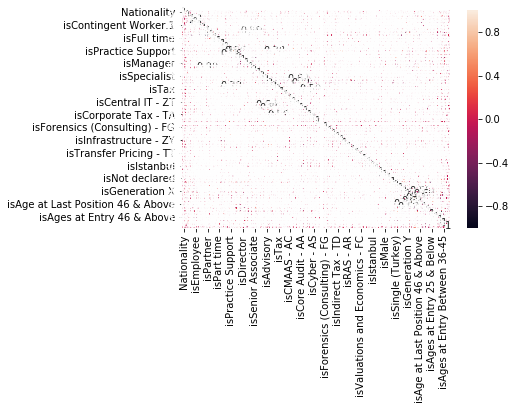

In [283]:
import seaborn as sn
corrMatrix = dfemployee.corr()
sn.heatmap(corrMatrix, annot=True)